In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples
n_samples=1000

In [3]:
#Create Labels and Features
X,y=make_circles(n_samples,noise=0.03,random_state=42)

Lets Visualize the data as it is hard to understand

In [4]:
import pandas as pd 

In [5]:
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Visualize it with  a Plot 

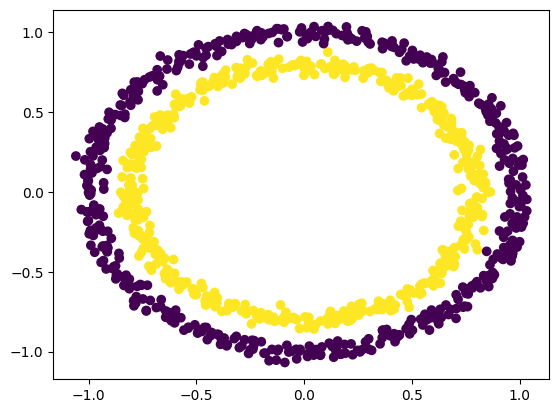

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(circles["X0"],circles["X1"],c=y)
plt.show()

Second Way of Visualization

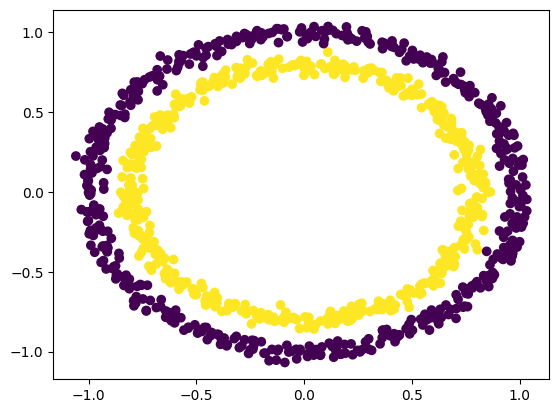

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

Model Creation


In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)
# Model 1 
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=5,verbose=0)

In [12]:
model1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4930 - loss: 0.7200


[0.7199986577033997, 0.49300000071525574]

Improve model by introducing a hidden a layer

In [13]:
tf.random.set_seed(42)
# Model 2 
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=100,verbose=0)

In [14]:
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4850 - loss: 0.6934


[0.693429708480835, 0.48500001430511475]

Again Try to improve again by changing optimizer , increasing hidden units and layers

In [15]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100,verbose=0)

In [16]:
model3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4920 - loss: 0.6947 


[0.6946943998336792, 0.492000013589859]

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):

    # Define axis boundraies for of the plot and create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
    y_min,y_max=X[:,1].min()+0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    # Create X value to make predictions on these
    x_in=np.c_[xx.ravel(),yy.ravel()]   # Stacks 2d array together

    # Make Predictions
    y_pred=model.predict(x_in)
    
    # check for multi-class 
    if len(y_pred[0])>1:
        print('You are doing multi-class classification')
        # Reshape Predictions to get ready for plotting 
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing Binary Classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    # Plot Decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


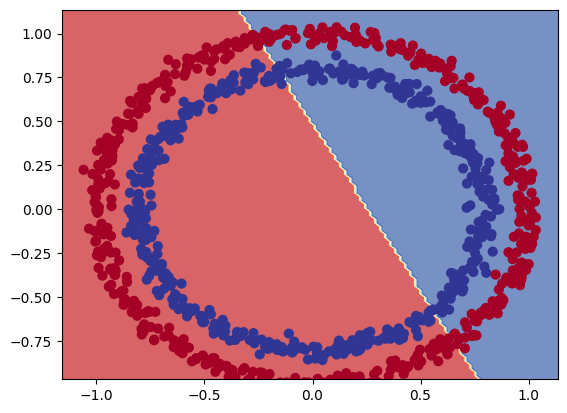

In [19]:
plot_decision_boundary(model3,X,y)

as our model is predicting a straight line 
lets try to fit it on straight data or linear data 


In [20]:
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)
len(X_regression),len(y_regression)

(200, 200)

In [21]:
# Train Test Split

X_train_regression = tf.expand_dims(X_regression[:150], axis=-1)  # Shape: (150, 1)
X_test_regression  = tf.expand_dims(X_regression[150:], axis=-1)  # Shape: (50, 1)

y_train_regression=y_regression[:150]
y_test_regression=y_regression[150:]




In [22]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model3.fit(X_train_regression,y_train_regression,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 540.1385 - mae: 540.1385
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 488.9974 - mae: 488.9974
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 437.5198 - mae: 437.5198
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 381.0349 - mae: 381.0349 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 336.9734 - mae: 336.9734
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 293.1562 - mae: 293.1562
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 246.4355 - mae: 246.4355
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 196.7855 - mae: 196.7855
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 143.9479 - mae: 143.9479
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 87.5485 - mae: 87.5485  
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 44.8673 - mae: 44.8673
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 56.7574 - mae: 56.7574 
Epoc

In [23]:
y_pred_reg=model3.predict(X_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


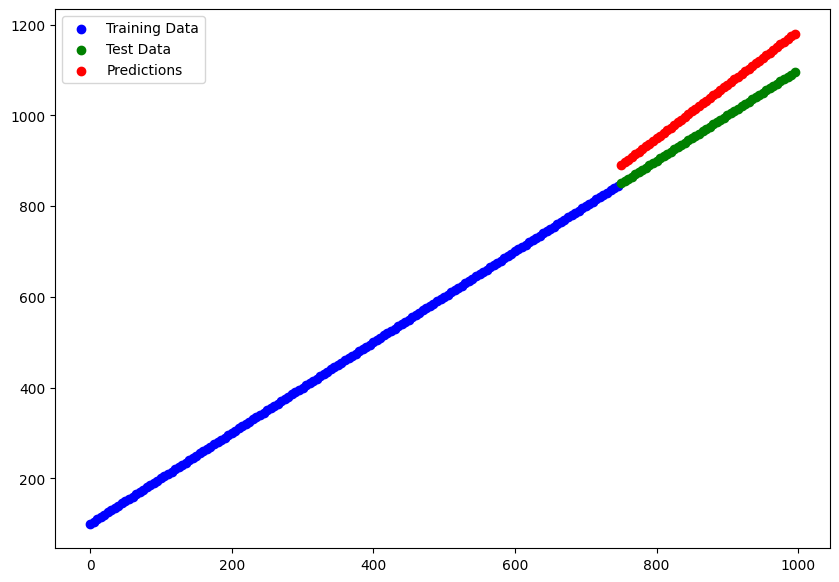

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg,c='r',label='Predictions')
plt.legend();

In [25]:
tf.random.set_seed(42)
# Model3 Improvised
model3_improvised=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3_improvised.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
model3_improvised.fit(X_train_regression,y_train_regression,epochs=230)

Epoch 1/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 241.7929 - mae: 241.7929
Epoch 2/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 110.4989 - mae: 110.4989
Epoch 3/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 93.3078 - mae: 93.3078  
Epoch 4/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 85.0768 - mae: 85.0768  
Epoch 5/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 75.8256 - mae: 75.8256  
Epoch 6/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 63.2456 - mae: 63.2456
Epoch 7/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 50.9645 - mae: 50.9645
Epoch 8/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 49.3277 - mae: 49.3277
Epoch 9/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.8459 - mae: 43.8459
Epoch 10/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 43.0565 - mae: 43.0565
Epoch 11/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 41.7169 - mae: 41.7169
Epoch 12/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 40.3377 - mae: 40.3377
Epoch 13/230
5/

In [26]:
y_pred_reg_improvised=model3_improvised.predict(X_test_regression)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/stepWARNING:tensorflow:6 out of the last 317 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E85AECDF80> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


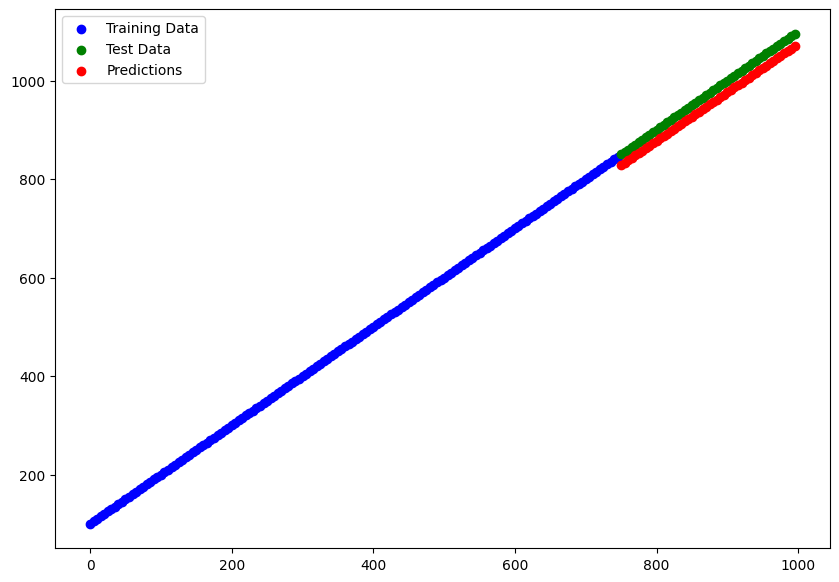

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg_improvised,c='r',label='Predictions')
plt.legend();

In [28]:
model3_improvised.evaluate(X_test_regression,y_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 23.5043 - mae: 23.5043 


[23.504281997680664, 23.504281997680664]

**Lets now See Linearity and Non-linearity**
> Staright and Not-Straight Lines

Linear Model with linear activation

In [29]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
model_4.fit(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4730 - loss: 4.5945


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


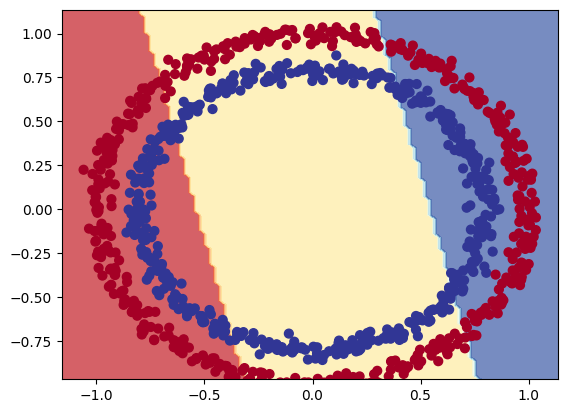

In [30]:
plot_decision_boundary(model_4,X,y)

First NN with non linear activation


In [31]:
tf.random.set_seed(42)

model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
])
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4850 - loss: 5.9887
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4850 - loss: 5.9569
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4840 - loss: 5.9594
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4840 - loss: 5.9572
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4840 - loss: 5.9566
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4840 - loss: 5.9561
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4840 - loss: 5.9556
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4840 - loss: 5.9551
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4840 - loss: 5.9546
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4840 - loss: 5.9541
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4840 - loss: 5.9537
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy

In [32]:
model5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4720 - loss: 4.6899   


[4.689924716949463, 0.47200000286102295]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


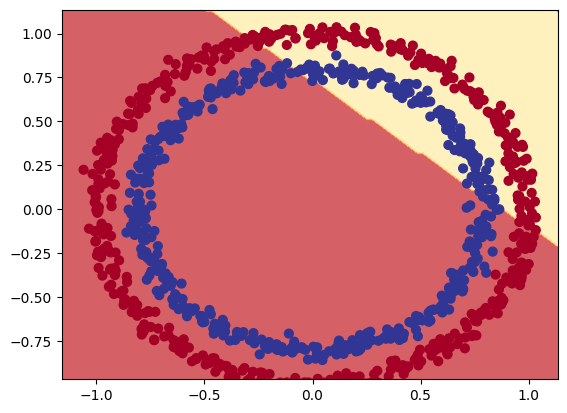

In [33]:
plot_decision_boundary(model5,X,y)

**As our model is still guessing so add more Layers with non linear activation**
* Add few more hidden layers 2 hidden layers
* Add few units like 4 units

In [34]:
tf.random.set_seed(42)

model6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
model6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [35]:
model6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 8.0590


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


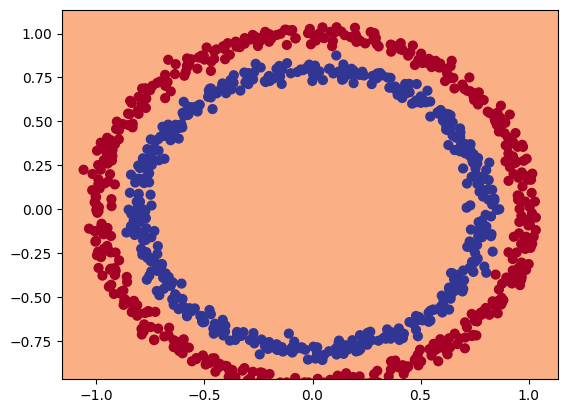

In [36]:
plot_decision_boundary(model6,X,y)

>Time To reveal our last trick in Bag 
* Added actiavtion sigmoid for last activation function

Last step to fix this now

In [37]:
tf.random.set_seed(42)
# Model Final
Final_model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

Final_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])
history=Final_model.fit(X,y,epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5250 - loss: 0.6925
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5410 - loss: 0.6921
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5220 - loss: 0.6919
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 0.6916
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 0.6912
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 0.6908
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5210 - loss: 0.6904
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 0.6899
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5210 - loss: 0.6894
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5270 - loss: 0.6889
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5290 - loss: 0.6884
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy:

In [38]:
Final_model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9980 - loss: 0.0159


[0.015916112810373306, 0.9980000257492065]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


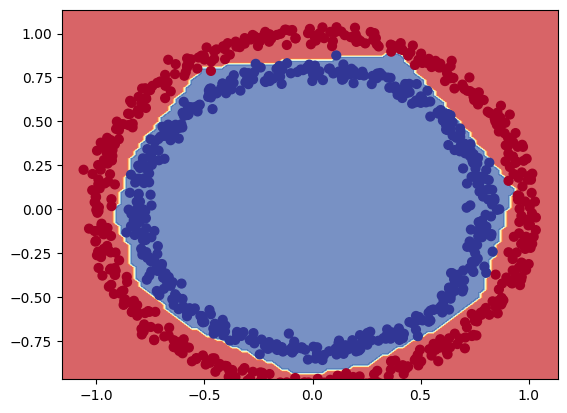

In [39]:
plot_decision_boundary(Final_model,X,y)

**Trying again to obtain acuuracy more quickly**
* Keeping learning rate a bit higher 
* Reducing epochs 10 times

In [40]:
len(X)

1000

In [42]:
# Spliting first data into three datasets

X_train,X_test,y_train,y_test=X[:800],X[800:],y[:800],y[800:]
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [50]:
tf.random.set_seed(42)
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
model_8.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

In [59]:
history=model_8.fit(X_train,y_train,epochs=35)

Epoch 1/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9925 - loss: 0.0282
Epoch 2/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9912 - loss: 0.0285
Epoch 3/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9925 - loss: 0.0291
Epoch 4/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9925 - loss: 0.0280
Epoch 5/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9912 - loss: 0.0292
Epoch 6/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9937 - loss: 0.0252
Epoch 7/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9912 - loss: 0.0277
Epoch 8/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9862 - loss: 0.0282
Epoch 9/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9912 - loss: 0.0297
Epoch 10/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9875 - loss: 0.0270
Epoch 11/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9912 - loss: 0.0288
Epoch 12/35
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9862 - lo

In [60]:
model_8.evaluate(X_test,y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9750 - loss: 0.0689


[0.0689055547118187, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


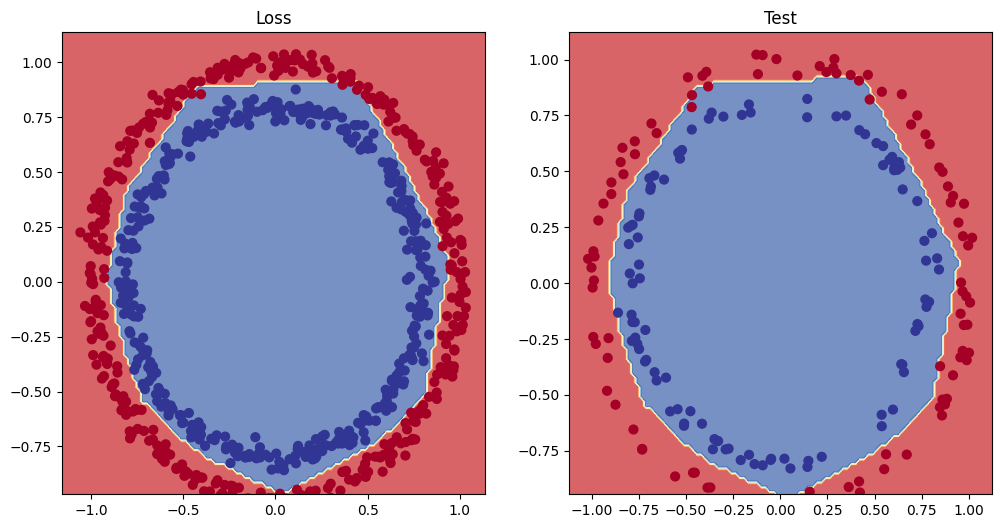

In [61]:
# Plotting 
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Loss')
plot_decision_boundary(model_8,X=X_train,y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X=X_test,y=y_test)
plt.show();

**Plot Model Loss Curve**

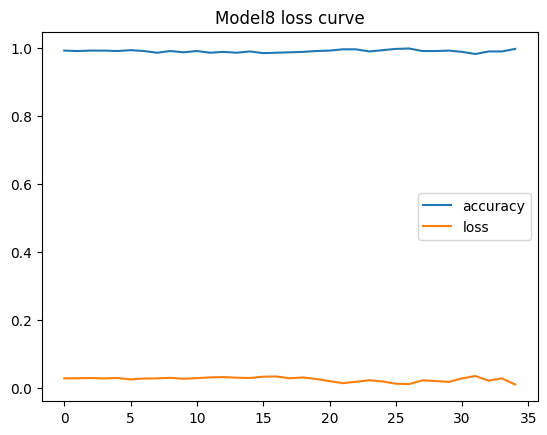

In [63]:
pd.DataFrame(history.history).plot()
plt.title('Model8 loss curve')
plt.show();